In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import locale
import os
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('pred_reviews_past12_pred12.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [24]:
df_norm = pd.read_csv('pred_reviews_past12_pred12.csv')
df_norm = df_norm.drop(['Unnamed: 0'],axis = 1)
print(df_norm.columns)
time_length = 12

full_y = np.array(df_norm.loc[:,'y'])
full_y = np.round(full_y / time_length)
df_norm = df_norm.drop(['mon_since_2010_01','bedrooms','neighs' ,'y'], axis = 1)

for col in df_norm.columns:
    minC, maxC = min(df_norm.loc[:,col]), max(df_norm.loc[:,col])
    normC = (df_norm.loc[:,col] - minC) / (maxC - minC)
    df_norm.loc[:,col] = normC

norm_x = np.array(df_norm)


Index(['mon_since_2010_01', 'neighs', 'bedrooms', 'rel_change_num_same_list',
       'rel_change_tot_list', 'rel_change_in_price',
       'rel_price_change_difference', 'current_price_night',
       'curr_price_rel_median_neigh_price', 'adjusted_price',
       'adj_price_rel_actual_price', 'rating', 'rating_rel', 'acc', 'acc_rel',
       'clean', 'clean_rel', 'check_in', 'check_in_rel', 'comm', 'comm_rel',
       'location', 'location_rel', 'value', 'value_rel', 'superhost',
       'num_amen', 'internet', 'air_con', 'avail_30', 'avail_30_rel',
       'avail_60', 'avail_60_rel', 'avail_90', 'avail_90_rel', 'avail_365',
       'avail_365_rel', 'num_reviews_pastNmon', 'cur_revpermonth', 'len_descr',
       'len_host_about', 'len_name', 'curr_min_nights', 'cleaning_fee',
       'cleaning_fee_rel_price', 'mon_since_first_rev', 'strict_conc_pol',
       'calc_host_list_count', 'y'],
      dtype='object')


In [23]:
print(df_norm.columns)

NameError: name 'df_norm' is not defined

In [35]:
## same as above but samples from the data
sample_size = 25000

df_sample = pd.read_csv('pred_reviews_past12_pred12.csv')
df_sample = df_sample.drop(['Unnamed: 0'],axis = 1)

df_sample = df_sample.sample(n = sample_size)
time_length = 12

full_y = np.array(df_sample.loc[:,'y'])
full_y = np.round(full_y / time_length)
df_sample = df_sample.drop(['mon_since_2010_01','bedrooms','neighs', 'current_price_night', 'adjusted_price', 'internet', 'superhost', 'air_con', 'strict_conc_pol', 'cleaning_fee' ,'y'], axis = 1)
features_names = list(df_sample.columns)


for col in df_sample.columns:
    minC, maxC = min(df_sample.loc[:,col]), max(df_sample.loc[:,col])
    normC = (df_sample.loc[:,col] - minC) / (maxC - minC)
    df_sample.loc[:,col] = normC

sample_x = np.array(df_sample)



In [26]:
num_clusters = 5
cluster = AgglomerativeClustering(n_clusters = num_clusters)
labels = cluster.fit_predict(sample_x)

In [36]:
print(features_names)

['rel_change_num_same_list', 'rel_change_tot_list', 'rel_change_in_price', 'rel_price_change_difference', 'curr_price_rel_median_neigh_price', 'adj_price_rel_actual_price', 'rating', 'rating_rel', 'acc', 'acc_rel', 'clean', 'clean_rel', 'check_in', 'check_in_rel', 'comm', 'comm_rel', 'location', 'location_rel', 'value', 'value_rel', 'num_amen', 'avail_30', 'avail_30_rel', 'avail_60', 'avail_60_rel', 'avail_90', 'avail_90_rel', 'avail_365', 'avail_365_rel', 'num_reviews_pastNmon', 'cur_revpermonth', 'len_descr', 'len_host_about', 'len_name', 'curr_min_nights', 'cleaning_fee_rel_price', 'mon_since_first_rev', 'calc_host_list_count']


In [57]:
y_clusters = [[],[],[],[],[]]
x_clusters = [[],[],[],[],[]]


for y_c, y_value, x_val in zip(labels, full_y, sample_x):
    y_clusters[y_c].append(y_value)
    x_clusters[y_c].append(x_val)
 

In [74]:
cluster_means = []
for x in x_clusters:
    all_means = []
    for i in range(len(x[0])):
        all_xi_vals = [z[i] for z in x]        
        mean = np.median(all_xi_vals)
        all_means.append(mean)
    cluster_means.append(all_means)


for i,feat in enumerate(features_names):
    x = ([t[i] for t in cluster_means])
    print(feat, max(x) - min(x))
   # print(x)

rel_change_num_same_list 0.005794003055717867
rel_change_tot_list 0.009044789566642286
rel_change_in_price 0.0
rel_price_change_difference 0.0
curr_price_rel_median_neigh_price 0.0
adj_price_rel_actual_price 0.00029347151649309483
rating 0.0
rating_rel 0.0029034824353808553
acc 0.0
acc_rel 0.0006889171137851591
clean 0.0
clean_rel 0.007326892463382362
check_in 0.0
check_in_rel 0.0002032482171285821
comm 0.0
comm_rel 0.00038158222035744593
location 0.0
location_rel 0.0007567600093119076
value 0.0
value_rel 0.0009366361539122625
num_amen 0.0
avail_30 0.03333333333333333
avail_30_rel 0.0027912756506302157
avail_60 0.016666666666666663
avail_60_rel 0.0028763214349702138
avail_90 0.011111111111111127
avail_90_rel 0.005855624242335156
avail_365 0.05479452054794526
avail_365_rel 0.013956061331464029
num_reviews_pastNmon 0.0
cur_revpermonth 0.0009541984732824443
len_descr 0.0
len_host_about 0.0025219007167507357
len_name 0.0
curr_min_nights 0.0
cleaning_fee_rel_price 0.003320770519263036
mon_s

In [63]:
print(len(cluster_means[0]))
print(len(features_names))

38
38


report mean and std dev of y val for each cluster

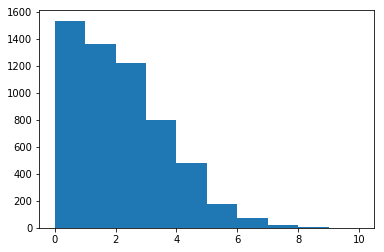

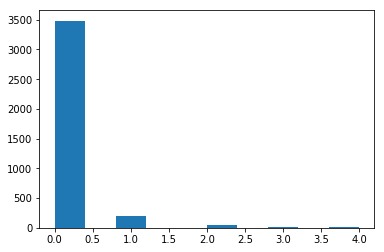

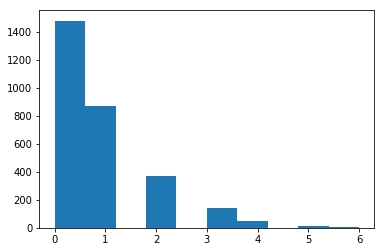

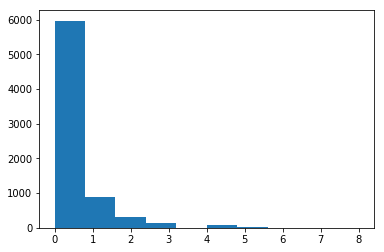

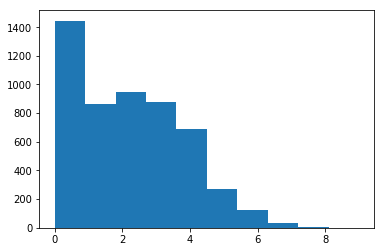

In [32]:
for c in y_clusters:
    plt.hist(c, bins = 10)
    plt.show()


In [7]:
print(len(sample_x))

500
